In [177]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import Normalizer

In [2]:
df = pd.read_csv("feature_extract.csv")

In [3]:
subject_id_and_knee = lambda row: str(row["ID"]) + ("-R" if row["is_right"] else "-L")
df["subject_id_and_knee"] = df.apply(subject_id_and_knee, axis=1)
df.head()

,ID,is_right,visit,filename,TKR,image_mean_intensity,image_median_intensity,lateral_tibial_cartilage_mean_intensity,lateral_tibial_cartilage_median_intenisty,lateral_tibial_cartilage_volume,...,lateral_meniscus_entropy,lateral_meniscus_opening,lateral_meniscus_closing,medial_meniscus_mean_intensity,medial_meniscus_median_intenisty,medial_meniscus_volume,medial_meniscus_entropy,medial_meniscus_opening,medial_meniscus_closing,subject_id_and_knee
0,9145384,True,0,9145384-Right-V00.nii.gz,True,0.010218,0.0,0.086474,0.087978,8034,...,2.584963,6,0,0.082723,0.080414,5,2.321928,5,0,9145384-R
1,9156448,True,6,9156448-Right-V06.nii.gz,False,0.062340,0.0,0.434564,0.444223,48680,...,7.554798,3972,820,0.358803,0.346614,9258,7.586551,4711,591,9156448-R
2,9113414,True,6,9113414-Right-V06.nii.gz,False,0.055244,0.0,0.412202,0.415556,58859,...,7.495517,6547,1442,0.396405,0.388889,19766,7.468549,7457,723,9113414-R
3,9187064,True,5,9187064-Right-V05.nii.gz,True,0.046611,0.0,0.350794,0.356870,33558,...,7.153197,2824,455,0.293073,0.295802,9036,7.305409,2593,203,9187064-R
4,9307242,True,3,9307242-Right-V03.nii.gz,False,0.055545,0.0,0.433012,0.444279,64852,...,8.043221,9166,1585,0.333139,0.316493,16665,7.742630,5115,1042,9307242-R


In [16]:
# All patients with at least three visits
visits = df["subject_id_and_knee"].value_counts()
visits_df = df[df["subject_id_and_knee"].isin(visits.index[visits.gt(1)])]

[3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


In [17]:
indices = list(list(zip(*visits_df.groupby("subject_id_and_knee")['visit'].nlargest(2).index.values))[1])
print(indices)

[148, 23, 155, 137, 12, 164, 18, 66, 69, 68, 29, 80, 149, 39, 2, 93, 123, 126, 1, 119, 64, 26, 139, 41, 85, 14, 89, 121, 105, 86, 11, 77, 19, 136, 109, 106]


In [18]:
subjects_df = df.iloc[indices].fillna(0.)
subjects_df.head()

,ID,is_right,visit,filename,TKR,image_mean_intensity,image_median_intensity,lateral_tibial_cartilage_mean_intensity,lateral_tibial_cartilage_median_intenisty,lateral_tibial_cartilage_volume,...,lateral_meniscus_entropy,lateral_meniscus_opening,lateral_meniscus_closing,medial_meniscus_mean_intensity,medial_meniscus_median_intenisty,medial_meniscus_volume,medial_meniscus_entropy,medial_meniscus_opening,medial_meniscus_closing,subject_id_and_knee
148,9018389,False,5,9018389-Left-V05.nii.gz,False,0.049936,0.0,0.436555,0.446602,41925,...,7.845265,3791,510,0.355073,0.350902,10693,7.988405,4300,312,9018389-L
23,9018389,False,1,9018389-Left-V01.nii.gz,False,0.040845,0.0,0.373298,0.380000,39765,...,7.101193,3492,296,0.318696,0.318000,12632,7.238193,5535,378,9018389-L
155,9023407,True,6,9023407-Right-V06.nii.gz,False,0.058766,0.0,0.424732,0.441584,69532,...,7.616639,12266,2938,0.312971,0.291089,19681,7.570230,7148,1936,9023407-R
137,9023407,True,0,9023407-Right-V00.nii.gz,False,0.012950,0.0,0.090243,0.093416,28781,...,7.242335,1495,6,0.069225,0.068724,5158,7.311488,4311,136,9023407-R
12,9027938,True,6,9027938-Right-V06.nii.gz,False,0.056181,0.0,0.491097,0.504854,57778,...,7.954899,5300,500,0.381100,0.378641,16119,8.093361,3273,358,9027938-R


In [19]:
exclude_columns = {"ID", "is_right", "visit", "filename", "subject_id_and_knee", "TKR"}
include_columns = list(set(df.columns.values) - exclude_columns)

In [20]:
X = []
Y = []
for subject_id in subjects_df["subject_id_and_knee"].unique():
    subject_rows = subjects_df[subjects_df["subject_id_and_knee"] == subject_id][include_columns]
    features = np.array([row.values for _, row in subject_rows.iterrows()]).reshape(-1)
    X.append(features)
    
    tkr = subjects_df[subjects_df["subject_id_and_knee"] == subject_id]["TKR"].values[0]
    Y.append(int(tkr))
    
X = np.array(X)
Y = np.array(Y)

In [38]:
X_train = X[:12]
X_test = X[12:]

Y_train = Y[:12]
Y_test = Y[12:]

print(Y_train)
print(Y_test)

[0 0 0 0 1 1 0 0 0 0 0 1]
[0 1 0 1 1 0]


In [42]:
normalizer = Normalizer().fit(X_train)
X_train_normalized = normalizer.transform(X_train)
X_test_normalized = normalizer.transform(X_test)

In [40]:
reg = LogisticRegression().fit(X_train_normalized, Y_train)
Y_pred = reg.predict(X_test_normalized)
print(Y_pred)
#Y_pred = np.where(Y_pred >= 0.5, 1, 0)

[1 1 0 0 0 1]


In [41]:
print(np.sum(Y_pred == Y_test) / Y_test.shape[0])

0.3333333333333333


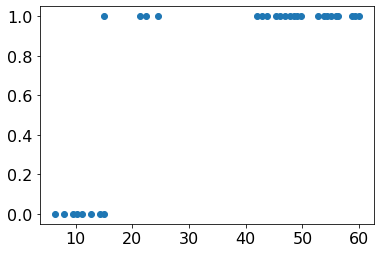

In [274]:
xs0 = [x for x in np.linspace(0, 15, 20) if np.random.random() > 0.7]
xs1 = [x for x in np.linspace(15, 35, 20) if np.random.random() > 0.7]
xs2 = [x for x in np.linspace(40, 60, 50) if np.random.random() > 0.7]
xs = np.array(xs0 + xs1 + xs2)


ys = np.array([0 for _ in xs0] + [1 for _ in xs1 + xs2])
plt.scatter(xs, ys)

In [275]:
reg = LinearRegression().fit(xs.reshape(-1, 1), ys)
log = LogisticRegression().fit(xs.reshape(-1, 1), ys)

In [276]:
reg_coef = reg.coef_[0]
reg_intercept = reg.intercept_

In [277]:
plot_xs = np.linspace(-10, 70, 1000)
reg_ys = reg.predict(plot_xs.reshape(-1, 1))
log_ys = log.predict_proba(plot_xs.reshape(-1, 1))[:, 1]

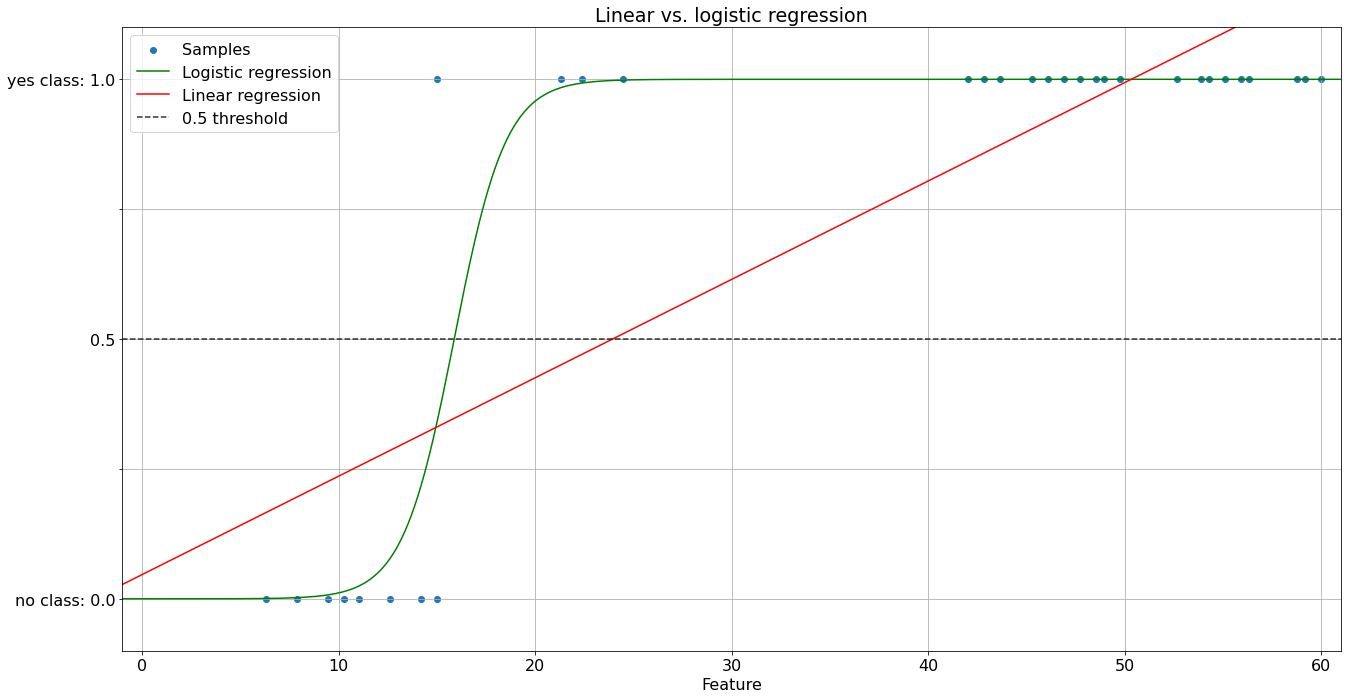

In [278]:
matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(19, 10))

ax.set_title("Linear vs. logistic regression")
ax.grid()
ax.set_xlabel("Feature")
ax.set_xlim(-1, 61)
ax.set_ylim(-0.1, 1.1)
ax.scatter(xs, ys, label="Samples")

ax.plot(plot_xs, log_ys, c="green", label="Logistic regression")
log_intersect = []

ax.plot(plot_xs, reg_ys, c="red", label="Linear regression")
reg_intersect = (0.5 - reg_intercept) / reg_coef
#ax.axvline(reg_intersect, label="Linear regression 0.5 threshold", c="red", linestyle="--", alpha=0.8)

ax.axhline(0.5, c="black", linestyle="--", alpha=0.8, label="0.5 threshold")

yticks = [0, 0.25, 0.5, 0.75, 1]
ax.yaxis.set_ticks(yticks)

ytick_labels = ["no class: 0.0", "", "0.5", "", "yes class: 1.0"]
ax.yaxis.set_ticklabels(ytick_labels)

ax.legend()
plt.tight_layout()
plt.savefig("lr-log.jpg")